<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/EnfoqueAlgor%C3%ADtmicoVersusEnfoqueEstad%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student_scores.csv to student_scores (1).csv
User uploaded file "student_scores.csv" with length 214 bytes


### **1**. Realice un análisis exploratorio del set de datos.
¿Algún insight?

In [35]:
df = pd.read_csv('student_scores.csv')

In [36]:
df.shape

(25, 2)

In [37]:
df.info()
#No hay valores Nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [39]:
X = df['Hours']

In [40]:
y = df['Scores']

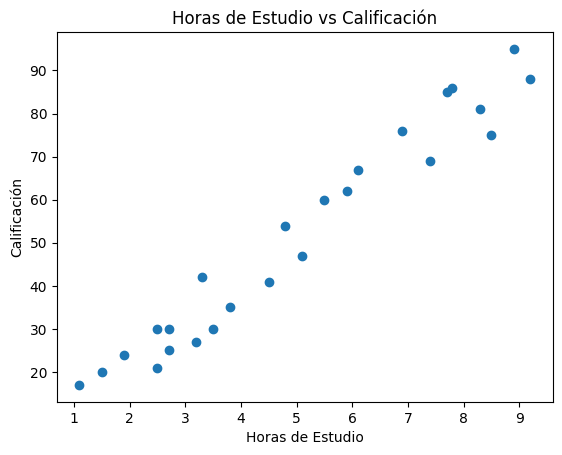

In [41]:
plt.scatter(x = df.Hours, y = df.Scores)


plt.title('Horas de Estudio vs Calificación')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.show()

In [42]:
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'Scores ~ Hours', data = df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           9.13e-17
Time:                        16:41:17   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

### **2**. Implemente el algoritmo de descenso de gradiente para establecer un modelo regresivo lineal.

In [43]:
# implementación en python

# calcula el valor predicho y
def h(theta, X):
  h = theta[0]  + theta[1] * X
  return h;

# definimos la funcion de costo en base al mse
def cost(theta, X, y):
  m = len(y)
  mse = 1 / (2*m) * sum((h(theta, X) - y)**2)
  return mse


def gradient_descent(theta, X, y, alpha=0.01):

  # nuevo theta, actualizado
  new_theta = [0,0]

  # cantidad de instancias
  m = len(y)

  new_theta[0] = theta[0] - alpha * 1/m * sum( h(theta, X) - y )
  new_theta[1] = theta[1] - alpha * 1/m * sum( (h(theta, X) - y) * X )

  return new_theta

In [44]:
# comprobando la funcion de costo
print(cost([1,4], X, y))
print(cost([0,0], X, y))
print(cost([2,-1], X, y))
print(cost([-2,3], X, y))
print(cost([-1,2], X, y))

579.5936
1632.02
1854.5126000000005
893.9254
1100.7463999999998


### **3**. Determine métricas de ajuste y error del modelo

In [66]:
# inicializacion aleatoria de theta
theta = [0,0]

# learning rate
alpha = 0.0001

# iteraciones
epochs = 100000

costs = []
for i in range(epochs):
  theta = gradient_descent(theta, X, y, alpha)
  loss = cost(theta, X, y)
  costs.append(loss)

print("Loss:", costs[-1], "Theta:", theta)

Loss: 14.443039775386877 Theta: [2.3529428120852782, 9.796905392740932]


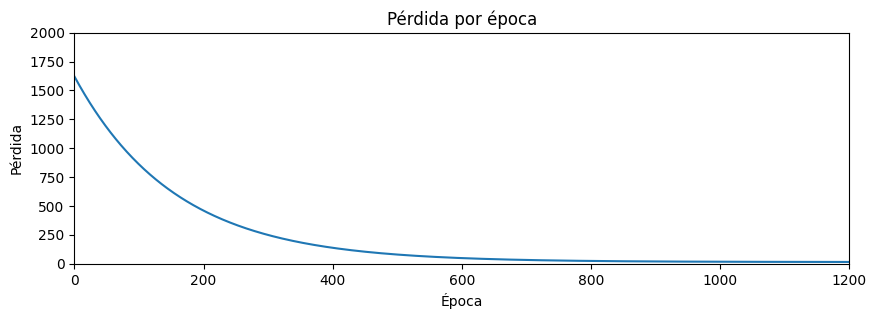

In [70]:
plt.figure(figsize=(10,3))

plt.title('Pérdida por época')
plt.plot(costs)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.ylim([0,2000])
plt.xlim([0,1200])
plt.show()